# Descripción del proyecto

### Acerca de la empresa

En 2016, Cyclistic lanzó su programa de bicicletas compartidas con gran éxito. Desde ese momento, la iniciativa ha crecido considerablemente, y hoy en día cuenta con una flota de 5,824 bicicletas equipadas con GPS, distribuidas en una red de 692 estaciones por toda la ciudad de Chicago. Los usuarios pueden tomar una bicicleta en cualquier estación y devolverla en otra dentro del sistema, en el momento que deseen.

Hasta ahora, la estrategia de marketing de Cyclistic se ha enfocado en generar reconocimiento de marca y atraer a una amplia variedad de usuarios. Una de las claves para lograrlo ha sido ofrecer planes de precios flexibles, incluyendo pases para un solo viaje, pases diarios y membresías anuales. A quienes eligen los pases de un solo uso o diarios se les conoce como ciclistas ocasionales, mientras que quienes optan por la membresía anual son considerados miembros de Cyclistic.

De acuerdo con los analistas financieros de la empresa, los miembros anuales resultan ser mucho más rentables que los ciclistas ocasionales. Si bien la variedad de precios ha ayudado a atraer a más usuarios, la directora de marketing, está convencida de que aumentar la cantidad de miembros anuales será clave para el crecimiento de la compañía. En lugar de enfocarse en una campaña dirigida a todos los nuevos usuarios, ella ve una gran oportunidad en convertir a los ciclistas ocasionales en miembros. Esto se debe a que estos usuarios ya están familiarizados con el servicio y han elegido Cyclistic como su opción de transporte.



¿Cuál es el problema que intentas resolver?

Aumentar el número de clientes anuales, con un enfoque especial a aquellos que ya son clientes ocasionales, que den el paso a ser miembros de Cyclistic.
Debemos conocer a ambos tipos de usuarios, como podrían convencerse de ser miembros anuales y de que manera esta estrategia puede ser influenciada mediante medios digitales. Analizaremos los datos históricos de los viajes realizados con dicha empresa, para identificar patrones y tendencias. 


Diseñar estrategias de marketing para convertir a ciclistas ocasionales en miembros anuales.

### Diccionario de datos

Los conjuntos de datos proporcionados correspondientes a los meses del año 2024, contienen 13 columnas con información sobre los viajes en bicicleta realizados por los clientes de Cyclistic. 

* **ride_id** :  id que identifica a cada viaje (16 caracteres número y letras mayúsculas)
* **rideable_type** :  tipo de bicicleta en que se realizó el viaje (electric / classic)
* **started_at** : fecha y hora en que comenzó el viaje
* **ended_at** : fecha y hora en que terminó el viaje 
* **start_station_name** : nombre de la estación en que inicio el viaje.
* **start_station_id** : id de la estación en que inició el viaje.
* **end_station_name** : nombre de la estación en que terminó el viaje.
* **end_station_id** : id de la estación en que terminó el viaje.
* **start_lat** : coordenadas de latitud en grados decimales donde inició el viaje  
* **start_lng** : coordenadas de longitud en grados decimales donde inició el viaje  
* **end_lat** : coordenadas de latitud en grados decimales donde terminó el viaje
* **end_lng** : coordenadas de longitud en grados decimales donde terminó el viaje
* **member_casual** : tipo de cliente ( miebro / ocasional)



Contamos con 12 archivos de tipo CSV, con la información de cada mes. 

### Importación de datos

In [101]:
import pandas as pd
import numpy as np
import os 

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
pip show nbformat

Note: you may need to restart the kernel to use updated packages.


In [100]:
pip install geopandas matplotlib contextily

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
    --------------------------------------- 0.3/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 2.0 MB/s eta 0:00:08
   -- ------------------------------------- 1.0/16.2 MB 1.8 MB/s eta 0:00:09
   --- ------------------------------------ 1.3/16.2 MB 1.6 MB/s eta 0:00:10
   --- ------------------------------------ 1.3/16.2 MB 1.6 MB/s eta 0:00:10
   --- ------------------------------------ 1.6/16.2 MB 1.3 MB/s eta 0:00:12
   ----- ---------------------------------- 2.1/16.2 MB 1.4 MB/s eta 0:00:11
   ----- ---------------------------------- 2.4/16.2 MB 1.4 MB/s eta 0:00:10
   ----- ---------------------------------- 2.4/16.2 MB 1.4 MB/s eta 0:00:10
   ------ --------------------------------- 2.6/16.2 MB 1.3 MB/s eta 0:00:11
   ------- -------------------------------- 2.9/16.2 MB 1.3 MB/s eta 0:00:11
   ------- -------------------------------- 3.1/16.2 MB 1.3 MB/s eta 0:00:11
   -------- -


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
raw_data_202401 = pd.read_csv('../datos_crudos/202401-divvy-tripdata.csv')
raw_data_202402 = pd.read_csv('../datos_crudos/202402-divvy-tripdata.csv')
raw_data_202403 = pd.read_csv('../datos_crudos/202403-divvy-tripdata.csv')
raw_data_202404 = pd.read_csv('../datos_crudos/202404-divvy-tripdata.csv')
raw_data_202405 = pd.read_csv('../datos_crudos/202405-divvy-tripdata.csv')
raw_data_202406 = pd.read_csv('../datos_crudos/202406-divvy-tripdata.csv') 
raw_data_202407 = pd.read_csv('../datos_crudos/202407-divvy-tripdata.csv') 
raw_data_202408 = pd.read_csv('../datos_crudos/202408-divvy-tripdata.csv') 
raw_data_202409 = pd.read_csv('../datos_crudos/202409-divvy-tripdata.csv') 
raw_data_202410 = pd.read_csv('../datos_crudos/202410-divvy-tripdata.csv') 
raw_data_202411 = pd.read_csv('../datos_crudos/202411-divvy-tripdata.csv') 
raw_data_202412 = pd.read_csv('../datos_crudos/202412-divvy-tripdata.csv') 

In [4]:
raw_data_202401.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144873 entries, 0 to 144872
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             144873 non-null  object 
 1   rideable_type       144873 non-null  object 
 2   started_at          144873 non-null  object 
 3   ended_at            144873 non-null  object 
 4   start_station_name  125708 non-null  object 
 5   start_station_id    125708 non-null  object 
 6   end_station_name    124124 non-null  object 
 7   end_station_id      124124 non-null  object 
 8   start_lat           144873 non-null  float64
 9   start_lng           144873 non-null  float64
 10  end_lat             144585 non-null  float64
 11  end_lng             144585 non-null  float64
 12  member_casual       144873 non-null  object 
dtypes: float64(4), object(9)
memory usage: 14.4+ MB


In [5]:
raw_data_202402.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223164 entries, 0 to 223163
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             223164 non-null  object 
 1   rideable_type       223164 non-null  object 
 2   started_at          223164 non-null  object 
 3   ended_at            223164 non-null  object 
 4   start_station_name  199746 non-null  object 
 5   start_station_id    199746 non-null  object 
 6   end_station_name    198013 non-null  object 
 7   end_station_id      198013 non-null  object 
 8   start_lat           223164 non-null  float64
 9   start_lng           223164 non-null  float64
 10  end_lat             222846 non-null  float64
 11  end_lng             222846 non-null  float64
 12  member_casual       223164 non-null  object 
dtypes: float64(4), object(9)
memory usage: 22.1+ MB


In [6]:
raw_data_202403.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301687 entries, 0 to 301686
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             301687 non-null  object 
 1   rideable_type       301687 non-null  object 
 2   started_at          301687 non-null  object 
 3   ended_at            301687 non-null  object 
 4   start_station_name  257432 non-null  object 
 5   start_station_id    257432 non-null  object 
 6   end_station_name    254547 non-null  object 
 7   end_station_id      254547 non-null  object 
 8   start_lat           301687 non-null  float64
 9   start_lng           301687 non-null  float64
 10  end_lat             301291 non-null  float64
 11  end_lng             301291 non-null  float64
 12  member_casual       301687 non-null  object 
dtypes: float64(4), object(9)
memory usage: 29.9+ MB


In [7]:
raw_data_202404.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415025 entries, 0 to 415024
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             415025 non-null  object 
 1   rideable_type       415025 non-null  object 
 2   started_at          415025 non-null  object 
 3   ended_at            415025 non-null  object 
 4   start_station_name  340232 non-null  object 
 5   start_station_id    340232 non-null  object 
 6   end_station_name    336506 non-null  object 
 7   end_station_id      336506 non-null  object 
 8   start_lat           415025 non-null  float64
 9   start_lng           415025 non-null  float64
 10  end_lat             414546 non-null  float64
 11  end_lng             414546 non-null  float64
 12  member_casual       415025 non-null  object 
dtypes: float64(4), object(9)
memory usage: 41.2+ MB


In [8]:
raw_data_202405.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609493 entries, 0 to 609492
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             609493 non-null  object 
 1   rideable_type       609493 non-null  object 
 2   started_at          609493 non-null  object 
 3   ended_at            609493 non-null  object 
 4   start_station_name  500445 non-null  object 
 5   start_station_id    500445 non-null  object 
 6   end_station_name    496762 non-null  object 
 7   end_station_id      496762 non-null  object 
 8   start_lat           609493 non-null  float64
 9   start_lng           609493 non-null  float64
 10  end_lat             608709 non-null  float64
 11  end_lng             608709 non-null  float64
 12  member_casual       609493 non-null  object 
dtypes: float64(4), object(9)
memory usage: 60.5+ MB


In [9]:
raw_data_202406.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710721 entries, 0 to 710720
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             710721 non-null  object 
 1   rideable_type       710721 non-null  object 
 2   started_at          710721 non-null  object 
 3   ended_at            710721 non-null  object 
 4   start_station_name  566696 non-null  object 
 5   start_station_id    566696 non-null  object 
 6   end_station_name    562694 non-null  object 
 7   end_station_id      562694 non-null  object 
 8   start_lat           710721 non-null  float64
 9   start_lng           710721 non-null  float64
 10  end_lat             709597 non-null  float64
 11  end_lng             709597 non-null  float64
 12  member_casual       710721 non-null  object 
dtypes: float64(4), object(9)
memory usage: 70.5+ MB


In [10]:
raw_data_202407.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748962 entries, 0 to 748961
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             748962 non-null  object 
 1   rideable_type       748962 non-null  object 
 2   started_at          748962 non-null  object 
 3   ended_at            748962 non-null  object 
 4   start_station_name  611997 non-null  object 
 5   start_station_id    611997 non-null  object 
 6   end_station_name    609738 non-null  object 
 7   end_station_id      609738 non-null  object 
 8   start_lat           748962 non-null  float64
 9   start_lng           748962 non-null  float64
 10  end_lat             747871 non-null  float64
 11  end_lng             747871 non-null  float64
 12  member_casual       748962 non-null  object 
dtypes: float64(4), object(9)
memory usage: 74.3+ MB


In [11]:
raw_data_202408.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755639 entries, 0 to 755638
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             755639 non-null  object 
 1   rideable_type       755639 non-null  object 
 2   started_at          755639 non-null  object 
 3   ended_at            755639 non-null  object 
 4   start_station_name  615048 non-null  object 
 5   start_station_id    615048 non-null  object 
 6   end_station_name    613414 non-null  object 
 7   end_station_id      613414 non-null  object 
 8   start_lat           755639 non-null  float64
 9   start_lng           755639 non-null  float64
 10  end_lat             754612 non-null  float64
 11  end_lng             754612 non-null  float64
 12  member_casual       755639 non-null  object 
dtypes: float64(4), object(9)
memory usage: 74.9+ MB


In [12]:
raw_data_202409.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821276 entries, 0 to 821275
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             821276 non-null  object 
 1   rideable_type       821276 non-null  object 
 2   started_at          821276 non-null  object 
 3   ended_at            821276 non-null  object 
 4   start_station_name  632126 non-null  object 
 5   start_station_id    632126 non-null  object 
 6   end_station_name    628326 non-null  object 
 7   end_station_id      628326 non-null  object 
 8   start_lat           821276 non-null  float64
 9   start_lng           821276 non-null  float64
 10  end_lat             820523 non-null  float64
 11  end_lng             820523 non-null  float64
 12  member_casual       821276 non-null  object 
dtypes: float64(4), object(9)
memory usage: 81.5+ MB


In [13]:
raw_data_202410.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616281 entries, 0 to 616280
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             616281 non-null  object 
 1   rideable_type       616281 non-null  object 
 2   started_at          616281 non-null  object 
 3   ended_at            616281 non-null  object 
 4   start_station_name  509134 non-null  object 
 5   start_station_id    509134 non-null  object 
 6   end_station_name    506764 non-null  object 
 7   end_station_id      506764 non-null  object 
 8   start_lat           616281 non-null  float64
 9   start_lng           616281 non-null  float64
 10  end_lat             615713 non-null  float64
 11  end_lng             615713 non-null  float64
 12  member_casual       616281 non-null  object 
dtypes: float64(4), object(9)
memory usage: 61.1+ MB


In [14]:
raw_data_202411.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335075 entries, 0 to 335074
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             335075 non-null  object 
 1   rideable_type       335075 non-null  object 
 2   started_at          335075 non-null  object 
 3   ended_at            335075 non-null  object 
 4   start_station_name  278872 non-null  object 
 5   start_station_id    278872 non-null  object 
 6   end_station_name    277431 non-null  object 
 7   end_station_id      277431 non-null  object 
 8   start_lat           335075 non-null  float64
 9   start_lng           335075 non-null  float64
 10  end_lat             334802 non-null  float64
 11  end_lng             334802 non-null  float64
 12  member_casual       335075 non-null  object 
dtypes: float64(4), object(9)
memory usage: 33.2+ MB


In [15]:
raw_data_202412.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178372 entries, 0 to 178371
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             178372 non-null  object 
 1   rideable_type       178372 non-null  object 
 2   started_at          178372 non-null  object 
 3   ended_at            178372 non-null  object 
 4   start_station_name  149181 non-null  object 
 5   start_station_id    149181 non-null  object 
 6   end_station_name    147596 non-null  object 
 7   end_station_id      147596 non-null  object 
 8   start_lat           178372 non-null  float64
 9   start_lng           178372 non-null  float64
 10  end_lat             178241 non-null  float64
 11  end_lng             178241 non-null  float64
 12  member_casual       178372 non-null  object 
dtypes: float64(4), object(9)
memory usage: 17.7+ MB


Comprobamos que los 12 archivos, contienen el mismo número de columnas con las mismas variables, lo que nos permite realizar una función que se encargue de limpiar cada uno de los dataframes con los mismos parámetros. Despúes podríamos agrupar los 12 meses en un solo df.

In [16]:
# Función para limpieza
def limpiar_viajes(df):
    df['started_at'] = pd.to_datetime(df['started_at'], errors='coerce')
    df['ended_at'] = pd.to_datetime(df['ended_at'], errors='coerce')
    
    columnas_nulas = ['start_station_name', 'start_station_id',
                      'end_station_name', 'end_station_id',
                      'end_lat', 'end_lng']
    df = df.dropna(subset=columnas_nulas)
    
    df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
    df = df[df['duration_min'] > 0]

    return df

# Ruta donde están los archivos CSV
carpeta_csv = "../datos_crudos"

# Lista para guardar los DataFrames limpios
dataframes_limpios = []

# Procesar todos los archivos CSV
for archivo in sorted(os.listdir(carpeta_csv)):
    if archivo.endswith(".csv"):
        ruta_completa = os.path.join(carpeta_csv, archivo)
        print(f"Procesando: {archivo}")

        df = pd.read_csv(ruta_completa)
        df_limpio = limpiar_viajes(df)
        
        print(f" → Filas después de limpieza: {df_limpio.shape[0]}")
        dataframes_limpios.append(df_limpio)

# Unir los archivos limpios
df_completo = pd.concat(dataframes_limpios, ignore_index=True)
print(f"\n Total combinado: {df_completo.shape}")

# Guardar en un nuevo archivo
df_completo.to_csv("../datos_limpios/viajes_limpios_combinados.csv", index=False)
print(" Archivo final guardado como 'viajes_limpios_combinados.csv'")

Procesando: 202401-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 113788
Procesando: 202402-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 184721
Procesando: 202403-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 230237
Procesando: 202404-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 297741
Procesando: 202405-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 442114
Procesando: 202406-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 494326
Procesando: 202407-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 540931
Procesando: 202408-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 541215
Procesando: 202409-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 537234
Procesando: 202410-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 449114
Procesando: 202411-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 245945
Procesando: 202412-divvy-tripdata.csv


C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3943020099.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60


 → Filas después de limpieza: 130730

 Total combinado: (4208096, 14)
 Archivo final guardado como 'viajes_limpios_combinados.csv'


In [17]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4208096 entries, 0 to 4208095
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  duration_min        float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 449.5+ MB


In [18]:
df_completo.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27,2024-01-12 15:37:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,7.533333
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46,2024-01-08 15:52:59,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7.216667
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19,2024-01-27 12:35:19,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8.000000
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17,2024-01-29 16:56:06,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,29.816667
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23,2024-01-31 06:09:35,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26.200000


In [19]:
df_completo.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min
3375122,AD05823FBB28D83C,classic_bike,2024-09-03 15:19:25.739,2024-09-03 15:47:45.766,Damen Ave/Coulter St,PI00001,Damen Ave/Coulter St,PI00001,41.849200,-87.675640,41.849200,-87.675640,casual,28.333783
171961,171AEA9EDD49D404,classic_bike,2024-02-13 13:36:32.000,2024-02-13 13:43:00.000,Lake Park Ave & 56th St,TA1309000063,University Ave & 57th St,KA1503000071,41.793242,-87.587782,41.791478,-87.599861,member,6.466667
3147176,4CA9AB44B31B342E,classic_bike,2024-09-16 13:52:35.897,2024-09-16 14:00:09.822,Wabash Ave & Adams St,KA1503000015,Canal St & Madison St,13341,41.879472,-87.625689,41.882409,-87.639767,member,7.565417
3208837,C0BA69D18B8DA21B,electric_bike,2024-09-08 10:47:09.700,2024-09-08 12:36:42.447,Central Park Ave & Bloomingdale Ave,18017,Central Park Ave & Bloomingdale Ave,18017,41.914166,-87.716755,41.914166,-87.716755,casual,109.545783
424357,8A6FC5CED97890A5,classic_bike,2024-03-22 22:10:27.000,2024-03-22 22:17:09.000,Clark St & Lincoln Ave,13179,Halsted St & Clybourn Ave,331,41.915689,-87.634600,41.909668,-87.648128,casual,6.700000
2024853,C12D247DE66905A2,classic_bike,2024-07-19 08:10:42.557,2024-07-19 08:14:15.260,Larrabee St & Webster Ave,13193,Clark St & Armitage Ave,13146,41.921822,-87.644140,41.918306,-87.636282,member,3.545050
243435,976BEB4A9EB3D76B,classic_bike,2024-02-26 16:22:17.000,2024-02-26 16:29:07.000,Walsh Park,18067,Sheffield Ave & Kingsbury St,13154,41.914610,-87.667968,41.910522,-87.653106,member,6.833333
509141,C1981F99545FD669,electric_bike,2024-03-02 18:01:11.000,2024-03-02 18:03:31.000,Sedgwick St & Huron St,TA1307000062,Wells St & Huron St,TA1306000012,41.894629,-87.638152,41.894722,-87.634362,member,2.333333
1265630,9E90037A4B451477,classic_bike,2024-05-28 11:25:27.000,2024-05-28 11:30:55.000,Clark St & Grace St,TA1307000127,Broadway & Cornelia Ave,13278,41.950780,-87.659172,41.945529,-87.646439,member,5.466667
1098855,760D2CC9AED9B8B7,electric_bike,2024-05-08 09:51:29.000,2024-05-08 09:59:00.000,Franklin St & Jackson Blvd,TA1305000025,Halsted St & Fulton St,23003,41.877518,-87.634730,41.886871,-87.648089,member,7.516667


In [20]:
df_completo.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration_min          0
dtype: int64

In [21]:
df_completo.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration_min
count,4208096,4208096,4.208096e+06,4.208096e+06,4.208096e+06,4.208096e+06,4.208096e+06
mean,2024-07-15 06:59:01.182693120,2024-07-15 07:15:40.733533952,4.189921e+01,-8.764391e+01,4.189972e+01,-8.764420e+01,1.665918e+01
min,2024-01-01 00:01:01,2024-01-01 00:07:01,4.164850e+01,-8.785797e+01,4.164850e+01,-8.784396e+01,1.716667e-03
25%,2024-05-18 08:09:40.750000128,2024-05-18 08:25:41,4.188032e+01,-8.765642e+01,4.188042e+01,-8.765694e+01,5.833333e+00
50%,2024-07-20 20:31:30.814499840,2024-07-20 20:54:44.665499904,4.189456e+01,-8.764083e+01,4.189472e+01,-8.764098e+01,1.013593e+01
75%,2024-09-17 14:41:14.948499968,2024-09-17 15:00:03.989499904,4.192533e+01,-8.762680e+01,4.192560e+01,-8.762694e+01,1.821667e+01
max,2024-12-31 23:56:49.854000,2024-12-31 23:59:28.819000,4.206487e+01,-8.752748e+01,4.206485e+01,-8.752823e+01,1.509367e+03
std,NaN,NaN,4.327575e-02,2.586505e-02,4.344671e-02,2.597024e-02,3.556501e+01


In [22]:
df_completo.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'duration_min'],
      dtype='object')

Al revisar las estadisticas descriptivas, hemos encontrado valores en la duración de los viajes que no son razonables, de menos de 1 min o de 25 horas. El esquema que ofrece la compañia es:

Member: 45 min como duración máxima después, se les cobra excendete por minuto.

Casual : 3 hrs como duración máxima después, se les cobra excedente por minuto. 

Un dato que puede generar sesgo son aquellos viajes que se convirtieron en cancelaciones, debido a alguna falla en el sistema, con la bicicleta o en el registro de los datos.  

In [23]:
# Guardar una copia del DataFrame original
df_completo_original = df_completo.copy()

In [24]:
# Identificar los viajes que fueron cancelados 
# (mismo punto de inicio y fin, duración menor a 5 minutos)

posibles_cancelaciones = df_completo[
    (df_completo['start_station_id'] == df_completo['end_station_id']) & (df_completo['duration_min'] <= 5)
]

In [25]:
# Imprimir cuantos viajes fueron cancelados
print(f"Total de posibles cancelaciones: {len(posibles_cancelaciones)}")

Total de posibles cancelaciones: 77964


In [26]:

posibles_cancelaciones.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min
3173,DB71503168A35BDB,classic_bike,2024-01-11 07:15:02,2024-01-11 07:15:35,Loomis St & Lexington St,13332,Loomis St & Lexington St,13332,41.872229,-87.661364,41.872229,-87.661364,member,0.550000
3176,4885D74467E98C50,classic_bike,2024-01-04 15:57:11,2024-01-04 15:59:21,Loomis St & Lexington St,13332,Loomis St & Lexington St,13332,41.872229,-87.661364,41.872229,-87.661364,member,2.166667
3177,3463D37EE0293EA7,electric_bike,2024-01-01 22:57:25,2024-01-01 23:00:36,Clark St & Drummond Pl,TA1307000142,Clark St & Drummond Pl,TA1307000142,41.931311,-87.644358,41.931248,-87.644336,member,3.183333
3179,9D101B79C2FB0195,classic_bike,2024-01-17 22:06:47,2024-01-17 22:07:06,Halsted St & Wrightwood Ave,TA1309000061,Halsted St & Wrightwood Ave,TA1309000061,41.929143,-87.649077,41.929143,-87.649077,member,0.316667
3182,0D45918BB963F06D,classic_bike,2024-01-02 07:05:08,2024-01-02 07:05:36,Ashland Ave & Augusta Blvd,13248,Ashland Ave & Augusta Blvd,13248,41.899643,-87.667700,41.899643,-87.667700,member,0.466667


In [27]:
posibles_cancelaciones.sort_values(by='duration_min', ascending=True).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min
1936855,C1C589ABD797C844,electric_bike,2024-07-05 14:28:28.916,2024-07-05 14:28:29.019,Columbus Dr & Randolph St,13263,Columbus Dr & Randolph St,13263,41.884539,-87.619663,41.884728,-87.619521,casual,0.001717
2747355,F0C63ABF7900425C,electric_bike,2024-08-22 07:21:15.911,2024-08-22 07:21:16.028,Clinton St & Lake St,13021,Clinton St & Lake St,13021,41.885637,-87.641823,41.885637,-87.641823,casual,0.001950
2494939,65A456F4087E6C08,electric_bike,2024-08-04 18:02:57.993,2024-08-04 18:02:58.132,Montrose Harbor,TA1308000012,Montrose Harbor,TA1308000012,41.963982,-87.638181,41.963982,-87.638181,member,0.002317
1481729,6BBADB7CF643BE3E,electric_bike,2024-06-23 17:57:43.882,2024-06-23 17:57:44.037,Millennium Park,13008,Millennium Park,13008,41.881249,-87.624106,41.881032,-87.624084,casual,0.002583
2735148,F96BA7D196152DB3,electric_bike,2024-08-20 09:26:35.911,2024-08-20 09:26:36.151,Campbell Ave & Irving Park Rd,439,Campbell Ave & Irving Park Rd,439,41.953634,-87.690782,41.953634,-87.690782,casual,0.004000
2480065,4736C11FAE891DA6,electric_bike,2024-08-04 17:21:32.878,2024-08-04 17:21:33.125,Mason Ave & Belmont Ave,473,Mason Ave & Belmont Ave,473,41.938368,-87.772503,41.938368,-87.772503,casual,0.004117
1586927,AE5D02874EA068F4,electric_bike,2024-06-19 18:22:03.954,2024-06-19 18:22:04.217,Hampden Ct & Diversey Ave,202480.0,Hampden Ct & Diversey Ave,202480.0,41.932418,-87.642456,41.932559,-87.642385,member,0.004383
2197841,D26C83283CAC7476,electric_bike,2024-07-02 23:36:49.971,2024-07-02 23:36:50.239,Green St & Madison St,TA1307000120,Green St & Madison St,TA1307000120,41.881851,-87.649170,41.881859,-87.649264,casual,0.004467
3253922,34A6D69376614E6F,electric_bike,2024-09-28 12:46:07.930,2024-09-28 12:46:08.240,Public Rack - Langley Ave & 49th St,1012,Public Rack - Langley Ave & 49th St,1012,41.805218,-87.609076,41.805218,-87.609076,member,0.005167
2121332,C552C9E33AEA5CF4,electric_bike,2024-07-12 18:50:36.689,2024-07-12 18:50:37.019,Campbell Ave & Augusta Blvd,410,Campbell Ave & Augusta Blvd,410,41.899578,-87.689497,41.899578,-87.689497,member,0.005500


In [28]:
# Guardar los viajes que fueron cancelados en un nuevo archivo CSV
posibles_cancelaciones.to_csv("../datos_limpios/viajes_cancelados.csv", index=False)
print(" Archivo de posibles cancelaciones guardado como 'viajes_cancelados.csv'")

 Archivo de posibles cancelaciones guardado como 'viajes_cancelados.csv'


In [29]:
# Crear un nuevo DataFrame sin esas filas
df_completo_filtrado = df_completo.drop(posibles_cancelaciones.index)

In [30]:
print(f"Filas antes: {len(df_completo)}")
print(f"Posibles cancelaciones: {len(posibles_cancelaciones)}")
print(f"Filas después de filtrar: {len(df_completo_filtrado)}")

Filas antes: 4208096
Posibles cancelaciones: 77964
Filas después de filtrar: 4130132


In [31]:
# Resetear el índice del DataFrame filtrado
df_completo_filtrado = df_completo_filtrado.reset_index(drop=True)

In [32]:
df_completo_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4130132 entries, 0 to 4130131
Data columns (total 14 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  duration_min        float64       
dtypes: datetime64[ns](2), float64(5), object(7)
memory usage: 441.1+ MB


In [33]:
# Redondear la duración min 
df_completo_filtrado['duration_min'] = df_completo_filtrado['duration_min'].round().astype(int)

In [34]:
# Comprobar si hay valores nulos en el DataFrame filtrado

df_completo_filtrado.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration_min          0
dtype: int64

In [35]:
# Revisar las metricas descriptivas del DataFrame filtrado
# sin los viajes cancelados 
df_completo_filtrado.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration_min
count,4130132,4130132,4.130132e+06,4.130132e+06,4.130132e+06,4.130132e+06,4.130132e+06
mean,2024-07-15 15:51:28.783406336,2024-07-15 16:08:25.527205888,4.189928e+01,-8.764390e+01,4.189980e+01,-8.764420e+01,1.694553e+01
min,2024-01-01 00:01:01,2024-01-01 00:07:01,4.164850e+01,-8.785797e+01,4.164850e+01,-8.784396e+01,0.000000e+00
25%,2024-05-18 13:26:35.750000128,2024-05-18 13:52:34.500000,4.188032e+01,-8.765642e+01,4.188042e+01,-8.765694e+01,6.000000e+00
50%,2024-07-21 11:37:19.037499904,2024-07-21 12:01:01.137999872,4.189466e+01,-8.764098e+01,4.189472e+01,-8.764109e+01,1.000000e+01
75%,2024-09-17 18:06:32.107500032,2024-09-17 18:21:21.538249984,4.192533e+01,-8.762682e+01,4.192560e+01,-8.762708e+01,1.800000e+01
max,2024-12-31 23:54:37.045000,2024-12-31 23:59:28.819000,4.206487e+01,-8.752748e+01,4.206485e+01,-8.752823e+01,1.509000e+03
std,NaN,NaN,4.319552e-02,2.569257e-02,4.336938e-02,2.580066e-02,3.583825e+01


Aun hay valores en 'duration_min' que son igual a 0, que tenemos que eliminar, porque esto nos idica que el viaje no se realizó. 


In [36]:
# Eliminar valores de la columna 'duration_min' que sean menores a 1 minuto.
df_completo_filtrado = df_completo_filtrado[df_completo_filtrado['duration_min'] >= 1]  


In [37]:
# Buscar valores duplicados en el DataFrame filtrado
    
df_completo_filtrado.duplicated().sum()

0

In [38]:
# Buscar ID duplicados en el DataFrame filtrado
df_completo_filtrado['ride_id'].duplicated().sum()

121

In [39]:
# Visualizar ID duplicados en el DataFrame filtrado
ride_id_duplicated = df_completo_filtrado[df_completo_filtrado.duplicated(subset=['ride_id'], keep=False)].sort_values(by='ride_id')

# Guardar los ID duplicados en un nuevo archivo CSV
ride_id_duplicated.to_csv('ride_id_duplicated.csv', index=False)
 

ride_id_duplicated

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min
1579380,05D27072A33A290C,classic_bike,2024-05-31 16:34:46.426,2024-06-01 04:12:45.545,Dearborn St & Erie St,13045,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.893992,-87.629318,41.932588,-87.636427,member,698
843595,05D27072A33A290C,classic_bike,2024-05-31 16:34:46.000,2024-06-01 04:12:45.000,Dearborn St & Erie St,13045,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.893992,-87.629318,41.932588,-87.636427,member,698
1677593,0625A51D397A68F9,classic_bike,2024-05-31 23:51:12.862,2024-06-01 00:01:17.815,Shedd Aquarium,15544,Dearborn St & Van Buren St,624,41.867226,-87.615355,41.876268,-87.629155,casual,10
1068759,0625A51D397A68F9,classic_bike,2024-05-31 23:51:12.000,2024-06-01 00:01:17.000,Shedd Aquarium,15544,Dearborn St & Van Buren St,624,41.867226,-87.615355,41.876268,-87.629155,casual,10
989743,07DBFDA3C91006AE,classic_bike,2024-05-31 22:35:31.000,2024-06-01 09:05:13.000,Western Ave & Walton St,KA1504000103,Western Ave & Walton St,KA1504000103,41.898418,-87.686596,41.898418,-87.686596,casual,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073068,FA03ED5FBCE6E570,classic_bike,2024-05-31 18:04:57.000,2024-06-01 00:51:24.000,Clark St & North Ave,13128,Wentworth Ave & Cermak Rd,13075,41.911974,-87.631942,41.853085,-87.631931,casual,406
1531320,FCA692A3455D0366,electric_bike,2024-05-31 23:56:30.372,2024-06-01 00:09:42.708,Fairbanks St & Superior St,18003,Leavitt St & Chicago Ave,18058,41.895464,-87.619711,41.895501,-87.682017,member,13
897447,FCA692A3455D0366,electric_bike,2024-05-31 23:56:30.000,2024-06-01 00:09:42.000,Fairbanks St & Superior St,18003,Leavitt St & Chicago Ave,18058,41.895464,-87.619711,41.895501,-87.682017,member,13
1249188,FEA150E7A56F187E,classic_bike,2024-05-31 23:09:06.280,2024-06-01 08:47:44.728,Sangamon St & Lake St,TA1306000015,State St & Kinzie St,13050,41.885779,-87.651025,41.889375,-87.627077,member,579


Filtramos los datos por ride_id para  vizualizar si habían filas duplicadas, se encontraron 121 ride_id duplicados. Podemos observar que es el dato de started_at y ended_at es dónde los datos cambian, todos los demas coinciden con su duplicado. Un patron importante a destacar es que la mayoría de estos viajes fueron realizados a las 23 hrs, lo que podría indicar que hay alguna falla con el registro de los viajes a esta hora. 

In [40]:
# Eliminar ride_id del df_completo_filtrado y dejar solo el primer duplicado

df_completo_filtrado = df_completo_filtrado.drop_duplicates(subset='ride_id', keep='first')

In [41]:
eliminados = df_completo_filtrado.duplicated(subset='ride_id').sum()
print(f'Duplicados restantes después del filtro: {eliminados}')

Duplicados restantes después del filtro: 0


In [42]:
df_completo_filtrado.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration_min
count,4129625,4129625,4.129625e+06,4.129625e+06,4.129625e+06,4.129625e+06,4.129625e+06
mean,2024-07-15 15:51:11.354984960,2024-07-15 16:08:07.969322240,4.189928e+01,-8.764390e+01,4.189980e+01,-8.764420e+01,1.694340e+01
min,2024-01-01 00:01:01,2024-01-01 00:07:01,4.164850e+01,-8.785797e+01,4.164850e+01,-8.784396e+01,1.000000e+00
25%,2024-05-18 13:24:32,2024-05-18 13:50:37,4.188032e+01,-8.765642e+01,4.188042e+01,-8.765694e+01,6.000000e+00
50%,2024-07-21 11:37:48.591000064,2024-07-21 12:01:35.863000064,4.189466e+01,-8.764098e+01,4.189472e+01,-8.764109e+01,1.000000e+01
75%,2024-09-17 18:07:25.673999872,2024-09-17 18:22:36.616000,4.192533e+01,-8.762682e+01,4.192560e+01,-8.762708e+01,1.800000e+01
max,2024-12-31 23:54:37.045000,2024-12-31 23:59:28.819000,4.206487e+01,-8.752748e+01,4.206485e+01,-8.752823e+01,1.509000e+03
std,NaN,NaN,4.319331e-02,2.568669e-02,4.336708e-02,2.579482e-02,3.579889e+01


Hay mucha dispersión en los datos: la media es 10 min, pero la desviación estándar es mas del triple. 
El 75% de los viajes dura menos de 18 min 
El valor máximo es sospechoso 1509 min(~25 horas) podríamos tener outliers, se aleja por mucho del valor mínimo de duración de viajes. Podríamos decir que los viajes mas tipicos llegan a durar 10 min. 

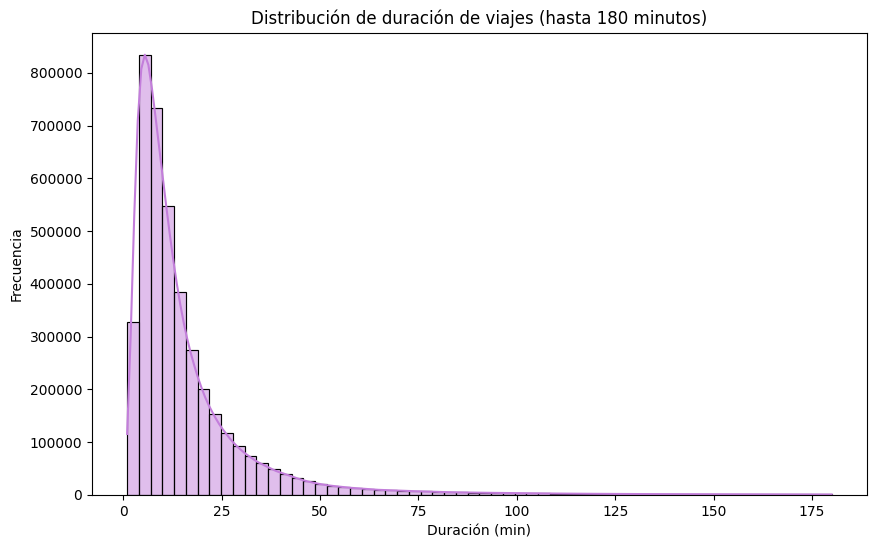

In [43]:
# Histograma acotado de duración de viajes para clientes 'member' y 'casual'

plt.figure(figsize=(10, 6))
sns.histplot(df_completo_filtrado[df_completo_filtrado['duration_min'] <= 180]['duration_min'], bins=60, kde=True, color='#C37EDB')
plt.title('Distribución de duración de viajes (hasta 180 minutos)')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.show()


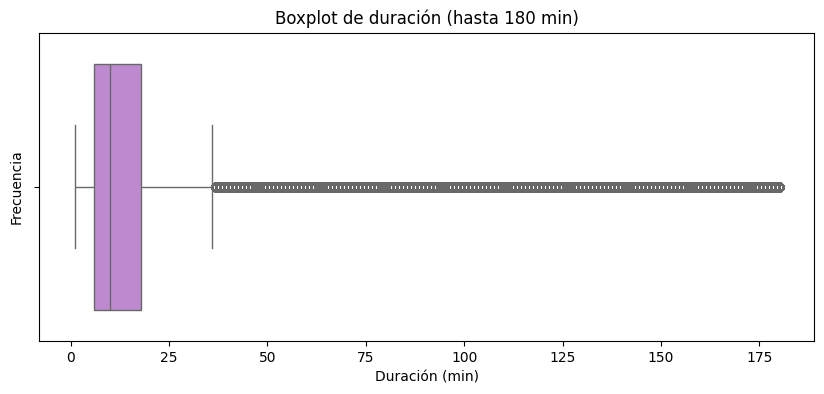

In [44]:

# Boxplot de duración limitado a 180  minutos
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_completo_filtrado[df_completo_filtrado['duration_min'] <= 180]['duration_min'], color='#C37EDB')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.title('Boxplot de duración (hasta 180 min)')
plt.show()

In [45]:
# Contar los tipos de usuarios 
df_completo_filtrado['member_casual'].value_counts()



member_casual
member    2651166
casual    1478459
Name: count, dtype: int64

In [46]:
# Operacion para obtener porcetaje de viajes cortos respecto al total de viajes
porcentaje_member = (2648462 / len(df_completo_filtrado)) * 100
porcentaje_casual = 100 - porcentaje_member
print(f"Porcentaje de viajes de miembros: {porcentaje_member:.2f}%")
print(f"Porcentaje de viajes casuales: {porcentaje_casual:.2f}%")

Porcentaje de viajes de miembros: 64.13%
Porcentaje de viajes casuales: 35.87%


Vamos a separar por tipo de clientes, cada uno tiene determinado tiempo de duración para sus viajes. 

In [47]:
def trip_class(row):
    if row['member_casual'] == 'member' and row['duration_min'] > 46:
        return 'exceeded'
    elif row['member_casual'] == 'casual' and row['duration_min'] > 180:
        return 'exceeded'
    else:
        return 'on_the_limit'

df_completo_filtrado['trip_status'] = df_completo_filtrado.apply(trip_class, axis=1)

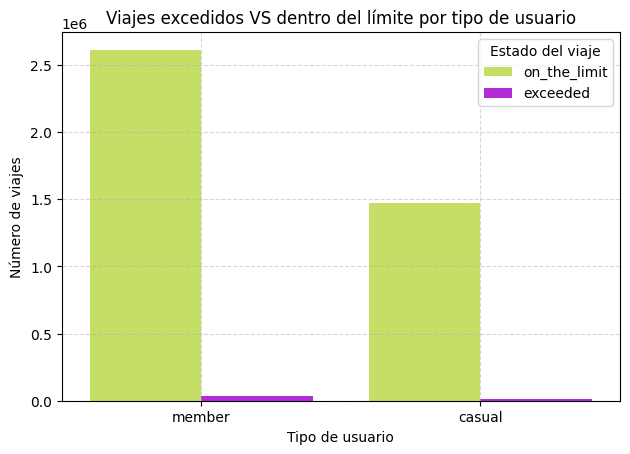

In [48]:
sns.countplot(
    data=df_completo_filtrado,
    x='member_casual',
    hue='trip_status',
    palette=['#D0F252', '#C10FF2']  # Aquí cambias la paleta
)
plt.title('Viajes excedidos VS dentro del límite por tipo de usuario')
plt.xlabel('Tipo de usuario')
plt.ylabel('Número de viajes')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Estado del viaje')
plt.tight_layout()
plt.show()


In [49]:
# Contamos los viajes por estado y tipo de usuario
conteo_estado = df_completo_filtrado.groupby(['member_casual', 'trip_status']).size().unstack()

# Calculamos los porcentajes
porcentaje_excedidos = (conteo_estado.div(conteo_estado.sum(axis=1), axis=0) * 100).round(2)

# Mostramos la tabla
print(porcentaje_excedidos)

trip_status    exceeded  on_the_limit
member_casual                        
casual             0.63         99.37
member             1.44         98.56


Con estos gráficos podemos asegurarnos que la cantidad de viajes que exceden los limites establecidos por las compañias no representan mas del 1.5% del total de los datos que se estan analizando,no afectan y pueden ser un publico atractivo para otro tipo de membresias. 

#### Estacionalidad 

In [50]:
# Extraer columna de month para análisis de estacionalidad
df_completo_filtrado['month'] = df_completo_filtrado['started_at'].dt.month

In [51]:
viajes_mensuales = df_completo_filtrado.groupby(['month', 'member_casual']).size().reset_index(name='number_of_trips')

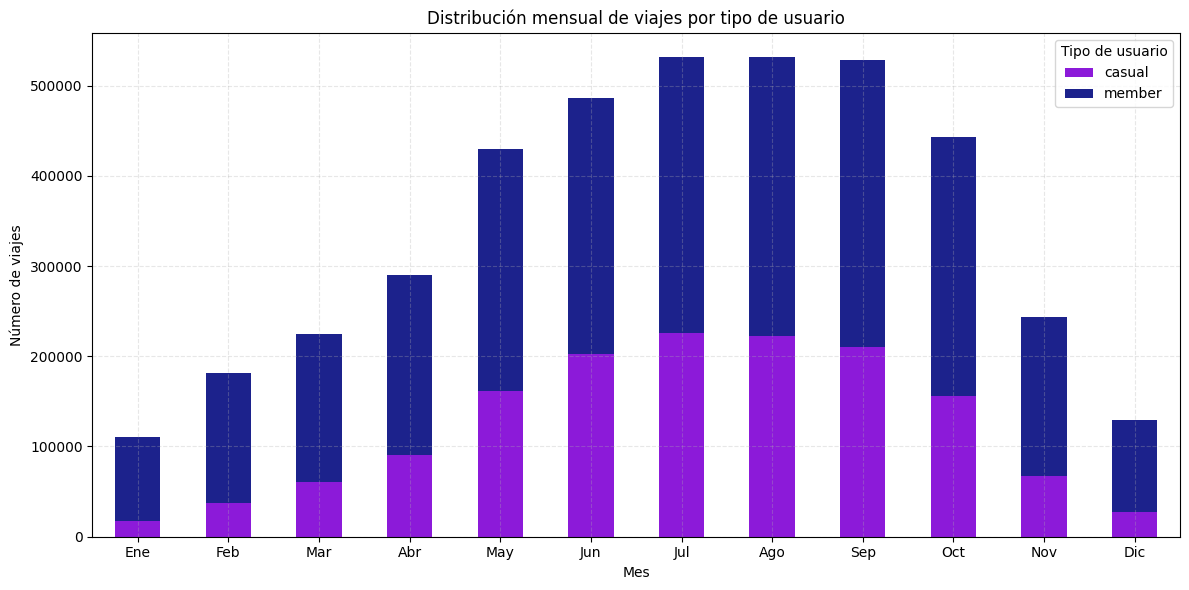

In [52]:
# Crear tabla pivot
pivot_viajes = viajes_mensuales.pivot(index='month', columns='member_casual', values='number_of_trips').fillna(0)

# Gráfico de barras apiladas
pivot_viajes.plot(kind='bar', stacked=True, figsize=(12,6), color=['#8C1AD9', '#1C228C'])
plt.title('Distribución mensual de viajes por tipo de usuario')
plt.xlabel('Mes')
plt.ylabel('Número de viajes')
plt.xticks(ticks=range(0,12), labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=0)
plt.legend(title='Tipo de usuario')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

La tendencia de miebros 'casuales' aumenta de mayo a septiembre, luego disminuye. En los meses con alta tendencia, podemos ver que el número de usuarios 'miembros' no disminuye, va a la par de los 'casuales'. 

##### ¿En qué días usan más las bicicletas? 

In [53]:
# Asegurar de que sea tipo datetime
df_completo_filtrado['started_at'] = pd.to_datetime(df_completo_filtrado['started_at'])

#Crear columna hora de inicio
df_completo_filtrado['hour'] = df_completo_filtrado['started_at'].dt.hour

# Renombrar la columna 'hour' a 'start_hour'
df_completo_filtrado.rename(columns={'hour': 'start_hour'}, inplace=True)

# Crear columna con día de la semana (0 = lunes, 6 = domingo)
df_completo_filtrado['day_week'] = df_completo_filtrado['started_at'].dt.dayofweek

dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_completo_filtrado['day_week'] = df_completo_filtrado['day_week'].apply(lambda x: dias[x])

# Definir el orden correcto
orden_dias = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Aplicar el orden como categoría
df_completo_filtrado['day_week'] = pd.Categorical(
    df_completo_filtrado['day_week'],
    categories=orden_dias,
    ordered=True
)

In [54]:
df_completo_filtrado

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,trip_status,month,start_hour,day_week
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27.000,2024-01-12 15:37:59.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,8,on_the_limit,1,15,Friday
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46.000,2024-01-08 15:52:59.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7,on_the_limit,1,15,Monday
2,F4A9CE78061F17F7,electric_bike,2024-01-27 12:27:19.000,2024-01-27 12:35:19.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902951,-87.634470,41.889177,-87.638506,member,8,on_the_limit,1,12,Saturday
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17.000,2024-01-29 16:56:06.000,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,30,on_the_limit,1,16,Monday
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23.000,2024-01-31 06:09:35.000,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26,on_the_limit,1,5,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130127,36DAF3C93190E07F,classic_bike,2024-12-13 15:40:06.123,2024-12-13 15:46:29.553,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,6,on_the_limit,12,15,Friday
4130128,71F02C3CF79B8090,classic_bike,2024-12-17 08:09:12.581,2024-12-17 08:15:50.134,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,7,on_the_limit,12,8,Tuesday
4130129,85AE8840FA0E4EAB,classic_bike,2024-12-18 08:22:40.737,2024-12-18 08:29:25.021,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,7,on_the_limit,12,8,Wednesday
4130130,15602635C5DF484E,electric_bike,2024-12-31 17:10:03.113,2024-12-31 17:17:21.838,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,7,on_the_limit,12,17,Tuesday


In [55]:
# Agrupar por tipo de usuario y día de la semana
# y contar la cantidad de viajes
frecuencia_dias = df_completo_filtrado.groupby(['member_casual', 'day_week'],observed=True).size().reset_index(name='number_of_trips')

In [56]:
# Calculamos proporción de viajes por día de la semana de cada tipo de usuario
frecuencia_dias['proporcion'] = frecuencia_dias.groupby('member_casual')['number_of_trips'].transform(lambda x: x / x.sum())


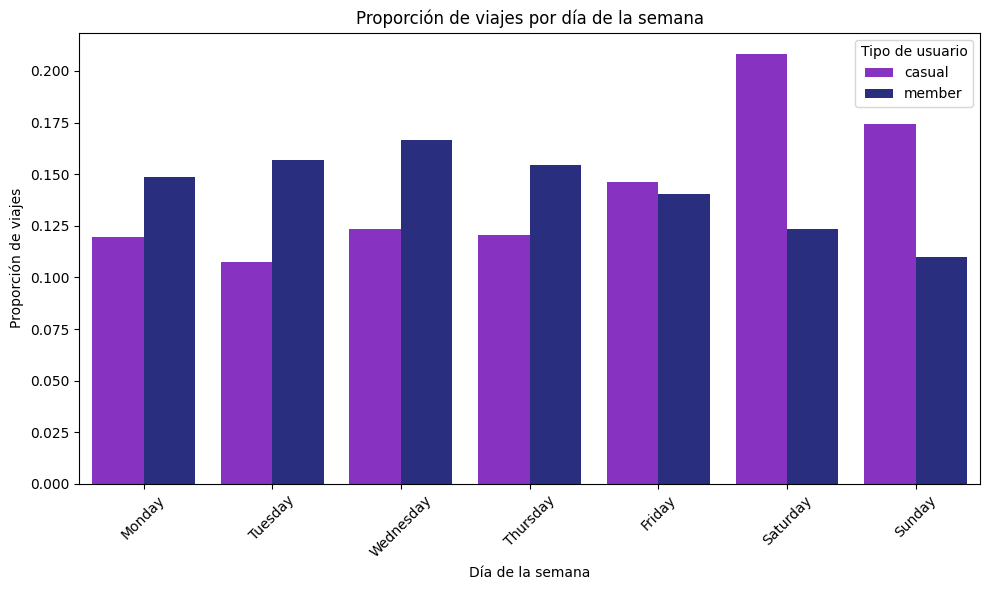

In [57]:
# Graficar Frecuencia de viajes por día de la semana
plt.figure(figsize=(10,6))
sns.barplot(
    data=frecuencia_dias,
    x='day_week',
    y='proporcion',
    hue='member_casual',
    color='member_casual',
    palette=['#8C1AD9', '#1C228C'],
)

plt.title('Proporción de viajes por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Proporción de viajes')
plt.xticks(rotation=45)
plt.legend(title='Tipo de usuario')
plt.tight_layout()
plt.show()

In [58]:
# Columna de porcentaje
# Convertir proporción a porcentaje
frecuencia_dias['percentage'] = (frecuencia_dias['proporcion'] * 100).round(2)

# Crear Pivot Table para mostrar porcentajes
# de frecuencia de viajes por día de la semana y tipo de usuario
df_porcentajes_frec_dias = frecuencia_dias.pivot(
    index='day_week',
    columns='member_casual',
    values='percentage'
).reset_index()

In [59]:
df_porcentajes_frec_dias

member_casual,day_week,casual,member
0,Monday,11.95,14.87
1,Tuesday,10.75,15.71
2,Wednesday,12.37,16.65
3,Thursday,12.08,15.43
4,Friday,14.63,14.03
5,Saturday,20.80,12.34
6,Sunday,17.43,10.97


In [60]:
# Sumar el porcentaje de ambos tipos de usuarios de luneas a viernes
casual_lunes_viernes = df_porcentajes_frec_dias.loc[0:4, 'casual'].sum()
miembro_lunes_viernes = df_porcentajes_frec_dias.loc[0:4, 'member'].sum()
print(f"Porcentaje de viajes casuales de lunes a viernes: {casual_lunes_viernes:.2f}%")
print(f"Porcentaje de viajes miembros de lunes a viernes: {miembro_lunes_viernes:.2f}%")


Porcentaje de viajes casuales de lunes a viernes: 61.78%
Porcentaje de viajes miembros de lunes a viernes: 76.69%


In [61]:
casual_fines = df_porcentajes_frec_dias.loc[5:6, 'casual'].sum()
miembro_fines = df_porcentajes_frec_dias.loc[5:6, 'member'].sum()
print(f"Porcentaje de viajes casuales fines de semana: {casual_fines:.2f}%")    
print(f"Porcentaje de viajes miembros fines de semana: {miembro_fines:.2f}%")

Porcentaje de viajes casuales fines de semana: 38.23%
Porcentaje de viajes miembros fines de semana: 23.31%


Los 'miembros' realizan mas viajes a lo largo de la semana, distribuidos de manera proporcional. En el caso de los usuarios 'ocasionales' alrededor del 38% del total de viajes de este grupo, los realizan los días sábados y domingos, posiblemente por el tipo de clientes que adquieren este tipo de membresia. 

Muchos usuarios casuales solo usan la bici como recreación/turismo (fines de semana, parques, zonas turísticas).En cambio, los usuarios miembros tienden a usarla para transporte regular (trabajo, escuela, etc.).Filtrar de lunes a viernes ayuda a: Aislar usuarios casuales que están usando la bici entre semana, lo cual es una señal de que podrían convertirse en miembros si se les motiva.

#### Comportamiento de viajes de lunes a viernes 

In [62]:
# Crear df con solo dias de la semana, para análisis mas detallado
df_weekdays = df_completo_filtrado[df_completo_filtrado['day_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [63]:
df_weekdays

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,trip_status,month,start_hour,day_week
0,C1D650626C8C899A,electric_bike,2024-01-12 15:30:27.000,2024-01-12 15:37:59.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903267,-87.634737,41.889177,-87.638506,member,8,on_the_limit,1,15,Friday
1,EECD38BDB25BFCB0,electric_bike,2024-01-08 15:45:46.000,2024-01-08 15:52:59.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.902937,-87.634440,41.889177,-87.638506,member,7,on_the_limit,1,15,Monday
3,0A0D9E15EE50B171,classic_bike,2024-01-29 16:26:17.000,2024-01-29 16:56:06.000,Wells St & Randolph St,TA1305000030,Larrabee St & Webster Ave,13193,41.884295,-87.633963,41.921822,-87.644140,member,30,on_the_limit,1,16,Monday
4,33FFC9805E3EFF9A,classic_bike,2024-01-31 05:43:23.000,2024-01-31 06:09:35.000,Lincoln Ave & Waveland Ave,13253,Kingsbury St & Kinzie St,KA1503000043,41.948797,-87.675278,41.889177,-87.638506,member,26,on_the_limit,1,5,Wednesday
6,0EA7CB313D4F456A,classic_bike,2024-01-05 14:44:12.000,2024-01-05 14:53:06.000,Wells St & Elm St,KA1504000135,Kingsbury St & Kinzie St,KA1503000043,41.903222,-87.634324,41.889177,-87.638506,member,9,on_the_limit,1,14,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130126,599BE7347D0B9CCC,classic_bike,2024-12-11 08:18:54.068,2024-12-11 08:26:50.164,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,8,on_the_limit,12,8,Wednesday
4130127,36DAF3C93190E07F,classic_bike,2024-12-13 15:40:06.123,2024-12-13 15:46:29.553,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,6,on_the_limit,12,15,Friday
4130128,71F02C3CF79B8090,classic_bike,2024-12-17 08:09:12.581,2024-12-17 08:15:50.134,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,7,on_the_limit,12,8,Tuesday
4130129,85AE8840FA0E4EAB,classic_bike,2024-12-18 08:22:40.737,2024-12-18 08:29:25.021,Albany Ave & Bloomingdale Ave,15655,California Ave & Milwaukee Ave,13084,41.914027,-87.705126,41.922695,-87.697153,member,7,on_the_limit,12,8,Wednesday


##### ¿A qué horas del día se realizan los viajes?

In [64]:

# Contar la cantidad de viajes por tipo de usuario y hora
frecuencia_horas_weekdays = df_weekdays.groupby(['member_casual', 'start_hour'], observed=True).size().reset_index(name='number_of_trips')


In [65]:
# Calculamos proporción de viajes por hora de cada tipo de usuario
frecuencia_horas_weekdays['percentage'] = frecuencia_horas_weekdays.groupby('member_casual')['number_of_trips'].transform(lambda x: x / x.sum())

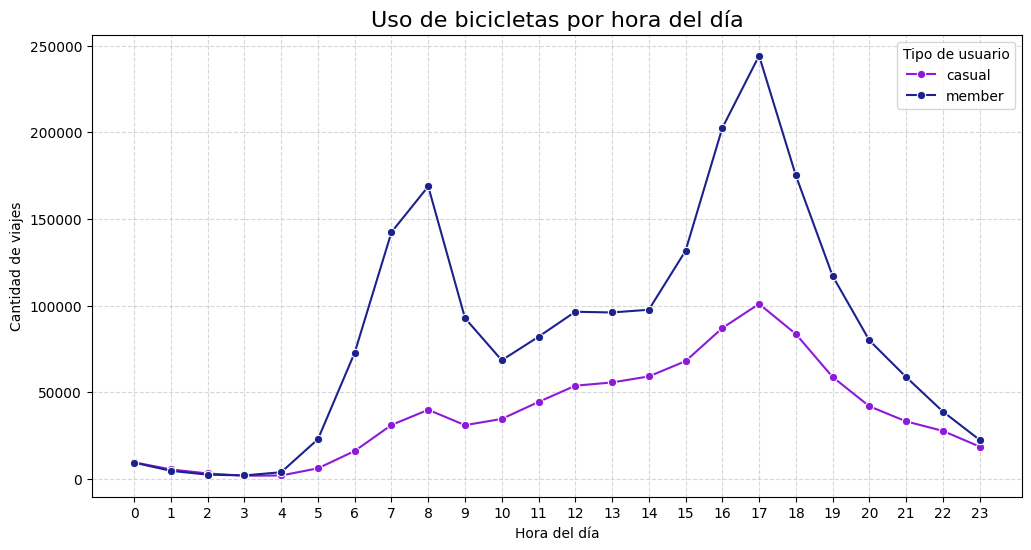

In [66]:
# Graficar el patron de viajes por hora
plt.figure(figsize=(12,6))
sns.lineplot(data=frecuencia_horas_weekdays, x='start_hour', y='number_of_trips', hue='member_casual', marker='o', palette=['#8C1AD9', '#1C228C'])
plt.title('Uso de bicicletas por hora del día', fontsize=16) 
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de viajes')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tipo de usuario')
plt.show()         

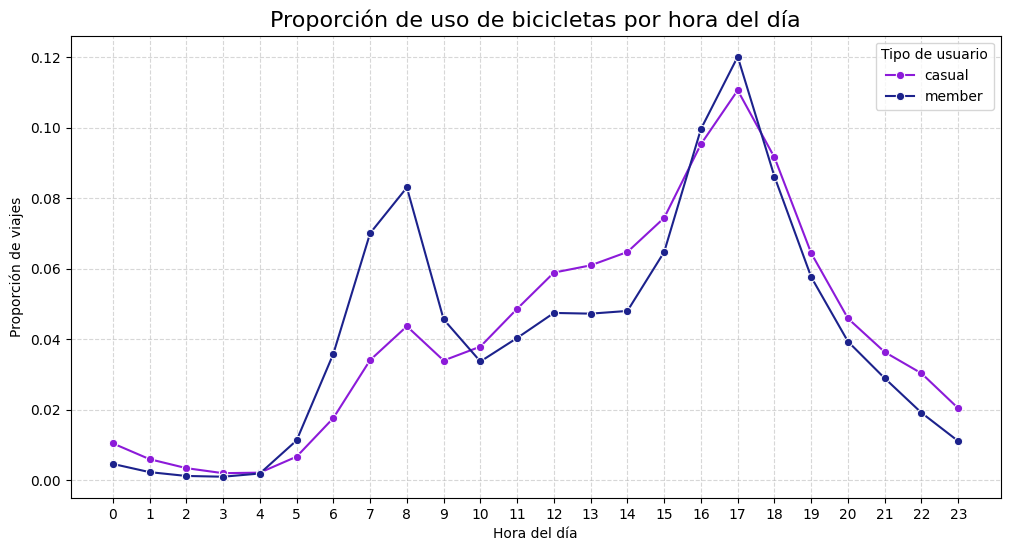

In [67]:
# Graficar el patron de viajes por hora
plt.figure(figsize=(12,6))
sns.lineplot(data=frecuencia_horas_weekdays, x='start_hour', y='percentage', hue='member_casual', marker='o',palette=['#8C1AD9', '#1C228C'])
plt.title('Proporción de uso de bicicletas por hora del día', fontsize=16)
plt.xlabel('Hora del día')
plt.ylabel('Proporción de viajes')
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Tipo de usuario')
plt.show()

In [68]:

# Columna de porcentaje
# Convertir proporción a porcentaje
frecuencia_horas_weekdays['percentage'] = (frecuencia_horas_weekdays['percentage'] * 100).round(2)

# Crear Pivot Table para mostrar porcentajes
# de frecuencia de horas en que se realizan los viajes y tipo de usuario
df_porcentajes_frec_horas_weekdays = frecuencia_horas_weekdays.pivot(
    index='start_hour',
    columns='member_casual',
    values='percentage'
).reset_index()

In [69]:
df_porcentajes_frec_horas_weekdays

member_casual,start_hour,casual,member
0,0,1.04,0.46
1,1,0.60,0.23
2,2,0.34,0.12
3,3,0.20,0.10
4,4,0.21,0.19
5,5,0.67,1.13
6,6,1.76,3.58
7,7,3.41,7.00
8,8,4.36,8.30
9,9,3.39,4.56


 Hay un comportamiento que llama nuestra atención en los usuarios 'ocasionales' realizan mas viajes en un horario de 13 a 18 hrs, luego comienza a disminuir. Para los 'miembros', los horarios con mayor porcentaje de viajes realizados son de 7 a 8 hrs y de 15 a 18 hrs, que normalmente son horarios de entrada y salidas de trabajos. Podríamos predecir que parte de los usuarios 'ocasionales' si utilizan el servicio como medio de transporte del trabajo a casa. 

##### ¿Qué estaciones usan más? 

In [70]:
# Revisar cuales son las estaciones más populares
# por tipo de usuario
# Agrupar por tipo de usuario y estación de inicio

frecuencia_estaciones_weekdays = df_weekdays.groupby(['member_casual', 'start_station_name'], observed=True).size().reset_index(name='number_of_trips')

In [71]:
# Calculamos proporción de viajes por estación de inicio de cada tipo de usuario
frecuencia_estaciones_weekdays['percentage'] = frecuencia_estaciones_weekdays.groupby('member_casual')['number_of_trips'].transform(lambda x: x / x.sum())

In [72]:
# Obtener las 5 estaciones más populares por tipo de usuario

top_stations_by_user_weekdays = frecuencia_estaciones_weekdays.groupby('member_casual').apply(
    lambda x: x.sort_values('percentage', ascending=False).head(5)
).reset_index(drop=True)

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\2743309332.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_stations_by_user_weekdays = frecuencia_estaciones_weekdays.groupby('member_casual').apply(


In [73]:
top_stations_by_user_weekdays.head(10)

,member_casual,start_station_name,number_of_trips,percentage
0,casual,Streeter Dr & Grand Ave,25130,0.027518
1,casual,DuSable Lake Shore Dr & Monroe St,15866,0.017374
2,casual,Michigan Ave & Oak St,12267,0.013433
3,casual,Shedd Aquarium,11168,0.012229
4,casual,DuSable Lake Shore Dr & North Blvd,11059,0.012110
5,member,Clinton St & Washington Blvd,23993,0.011800
6,member,Kingsbury St & Kinzie St,21891,0.010766
7,member,Clinton St & Madison St,19900,0.009787
8,member,Clinton St & Jackson Blvd,17043,0.008382
9,member,Clark St & Elm St,16518,0.008124


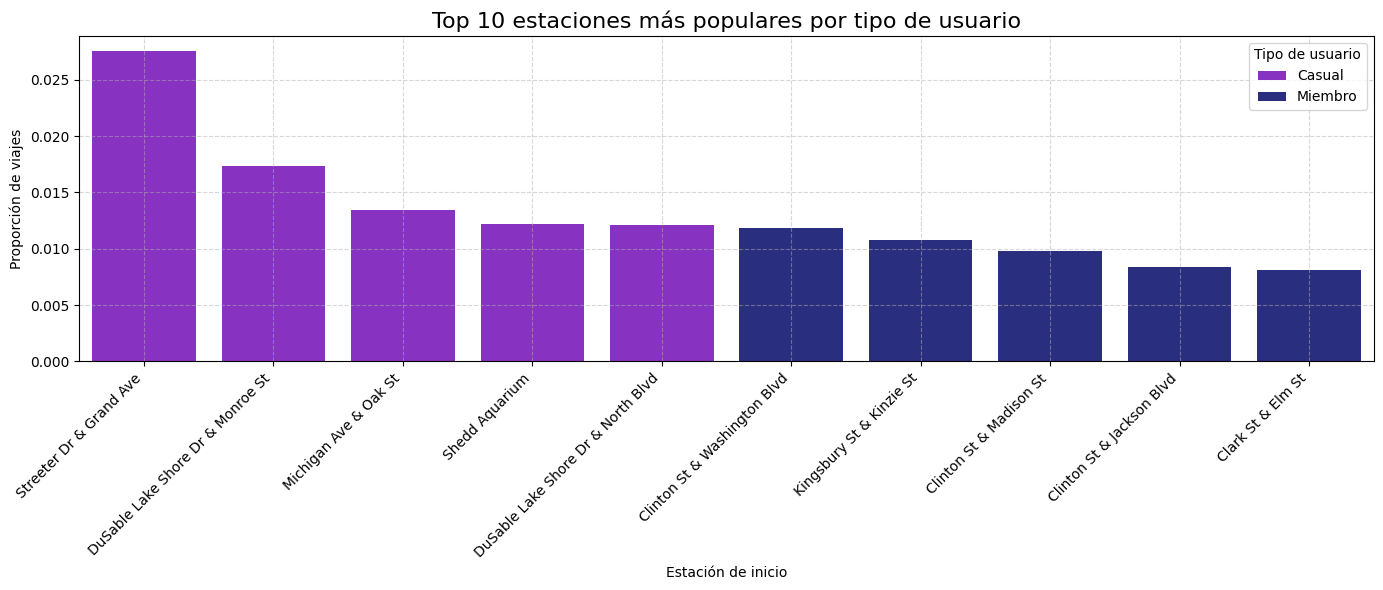

In [74]:

# Definir los colores manualmente para cada tipo de usuario
colores = {'casual': '#8C1AD9', 'member': '#1C228C'}    # Paleta de colores personalizada

# Graficar
plt.figure(figsize=(14,6))
ax = sns.barplot(
    data=top_stations_by_user_weekdays,
    x='start_station_name',
    y='percentage',
    hue='member_casual',
    palette=colores
)
plt.title('Top 10 estaciones más populares por tipo de usuario', fontsize=16)
plt.xlabel('Estación de inicio')
plt.ylabel('Proporción de viajes')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.5)

# Corregir la leyenda para que respete colores y orden
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Casual', 'Miembro']  # Etiquetas que deseas mostrar
plt.legend(handles=handles, labels=new_labels, title='Tipo de usuario')

plt.tight_layout()
plt.show()



¿Cuáles son las rutas más comunes? 

In [75]:
# Agrupar por las rutas mas comunes (inicio y fin)  
# y contar la cantidad de viajes

frecuencia_rutas_weekdays = df_weekdays.groupby(['member_casual', 'start_station_name', 'end_station_name'], observed=True).size().reset_index(name='number_of_trips')
# Calculamos proporción de viajes por ruta de cada tipo de usuario}

frecuencia_rutas_weekdays['percentage'] = frecuencia_rutas_weekdays.groupby('member_casual')['number_of_trips'].transform(lambda x: x / x.sum())

# Obtener las 10 estaciones más populares por tipo de usuario

top_rutas_by_user_weekdays = (
    frecuencia_rutas_weekdays
    .sort_values('percentage', ascending=False)
    .groupby('member_casual', group_keys=False)
    .head(10)
)

In [76]:
top_rutas_by_user_weekdays.head(10)


,member_casual,start_station_name,end_station_name,number_of_trips,percentage
89479,casual,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,3580,0.003920
32222,casual,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,2988,0.003272
32425,casual,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,2749,0.003010
62367,casual,Michigan Ave & Oak St,Michigan Ave & Oak St,2090,0.002289
213868,member,State St & 33rd St,Calumet Ave & 33rd St,4612,0.002268
117081,member,Calumet Ave & 33rd St,State St & 33rd St,4405,0.002166
89255,casual,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St,1460,0.001599
79896,casual,Shedd Aquarium,Streeter Dr & Grand Ave,1392,0.001524
146466,member,Ellis Ave & 60th St,Ellis Ave & 55th St,3032,0.001491
33393,casual,Dusable Harbor,Streeter Dr & Grand Ave,1338,0.001465


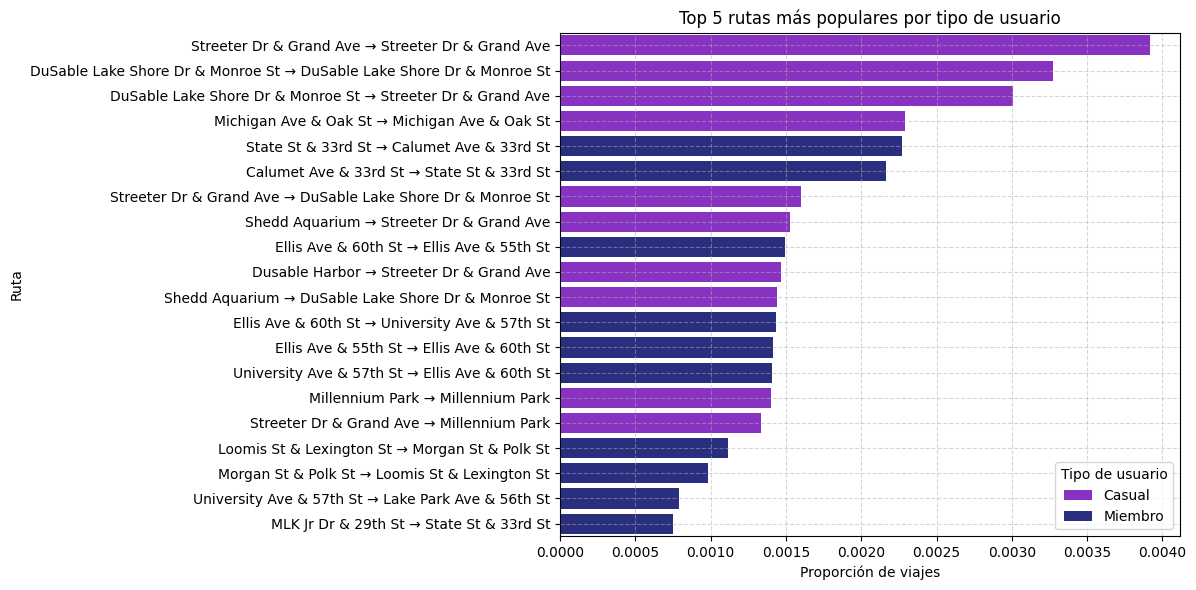

In [77]:
# Crear columna con el nombre de la ruta
top_rutas_by_user_weekdays['ruta'] = top_rutas_by_user_weekdays['start_station_name'] + " → " + top_rutas_by_user_weekdays['end_station_name']

# Graficar
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_rutas_by_user_weekdays,
    y='ruta',
    x='percentage',
    hue='member_casual',
    palette=['#8C1AD9', '#1C228C']
)
plt.title('Top 5 rutas más populares por tipo de usuario')
plt.xlabel('Proporción de viajes')
plt.ylabel('Ruta')
plt.legend(title='Tipo de usuario', labels=['Casual', 'Miembro'])
plt.grid(True, linestyle='--', alpha=0.5)

# Corregir la leyenda para que respete colores y orden
handles, labels = ax.get_legend_handles_labels()
new_labels = ['Casual', 'Miembro']  # Etiquetas que deseas mostrar
plt.legend(handles=handles, labels=new_labels, title='Tipo de usuario')

plt.tight_layout()
plt.show()

En la exploración de rutas mas comunes entre semana, los usuarios 'ocasionales' presentan 4 rutas con una proporción de viajes alta. Tres de estas rutas comienzan y terminan en la misma estación: 
- Streeter Dr & Grand Ave 
- DuSable Lake Shore Dr & Monroe St
- Michigan Ave & Oak St 

La otra ruta va de DuSable Lake Shore Dr & Monroe St → Streeter Dr & Grand Ave. Dichos puertos se encuentran en atractivos turisticos de Chicago, que cuentan con parques y rutas que pueden recorrerse en bicicleta.

In [78]:
rutas_con_tiempo = df_weekdays.groupby(
    ['member_casual', 'start_station_name', 'end_station_name'],
    observed=True
).agg(
    number_of_trips=('duration_min', 'count'),
    avg_trip_duration_min=('duration_min', 'mean')
).reset_index()

In [79]:
rutas_con_tiempo

,member_casual,start_station_name,end_station_name,number_of_trips,avg_trip_duration_min
0,casual,2112 W Peterson Ave,2112 W Peterson Ave,8,48.375
1,casual,2112 W Peterson Ave,Bernard St & Peterson Ave,1,15.000
2,casual,2112 W Peterson Ave,Broadway & Argyle St,1,19.000
3,casual,2112 W Peterson Ave,Broadway & Cornelia Ave,1,20.000
4,casual,2112 W Peterson Ave,Broadway & Granville Ave,5,15.200
...,...,...,...,...,...
234541,member,Yates Blvd & 93rd St,Bradley Park,1,7.000
234542,member,Yates Blvd & 93rd St,Oglesby Ave & 100th St,1,30.000
234543,member,Yates Blvd & 93rd St,Public Rack - Lafayette Ave & 95th St,1,18.000
234544,member,Yates Blvd & 93rd St,Public Rack - Oglesby Ave & 95th St,1,3.000


In [80]:
top_rutas_con_tiempo = rutas_con_tiempo.groupby('member_casual', observed=True).apply(
    lambda x: x.sort_values('number_of_trips', ascending=False).head(10) 
).reset_index(drop=True)

C:\Users\Fernanda\AppData\Local\Temp\ipykernel_23428\3096778854.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_rutas_con_tiempo = rutas_con_tiempo.groupby('member_casual', observed=True).apply(


In [81]:
top_rutas_con_tiempo

,member_casual,start_station_name,end_station_name,number_of_trips,avg_trip_duration_min
0,casual,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,3580,50.528212
1,casual,DuSable Lake Shore Dr & Monroe St,DuSable Lake Shore Dr & Monroe St,2988,44.503012
2,casual,DuSable Lake Shore Dr & Monroe St,Streeter Dr & Grand Ave,2749,27.135686
3,casual,Michigan Ave & Oak St,Michigan Ave & Oak St,2090,59.135885
4,casual,Streeter Dr & Grand Ave,DuSable Lake Shore Dr & Monroe St,1460,26.752055
5,casual,Shedd Aquarium,Streeter Dr & Grand Ave,1392,33.706897
6,casual,Dusable Harbor,Streeter Dr & Grand Ave,1338,26.391629
7,casual,Shedd Aquarium,DuSable Lake Shore Dr & Monroe St,1319,19.297953
8,casual,Millennium Park,Millennium Park,1279,61.527756
9,casual,Streeter Dr & Grand Ave,Millennium Park,1221,31.473382


## Clientes 'Casuales' potenciales a convertirse en 'Miembros'

Si un cliente casual ya tiene un comportamiento que se alinea con los beneficios del plan para miembros, entonces es un candidato ideal para la conversión.

#### ¿Qué porcentaje de miebros 'casuales' utilizan la bici menos de 45 min de lunes a viernes? 

In [82]:
# Crear filtrado para posibles miembros viajes < 45 minutos de lunes a viernes

posibles_miembros = df_weekdays[
    (df_weekdays['member_casual'] == 'casual') &
    (df_weekdays['duration_min'] <= 45)
]

In [83]:
posibles_miembros.shape
print(f"Total de posibles miembros: {len(posibles_miembros)}")

Total de posibles miembros: 823736


In [84]:
# Porcentaje de viajes casuales menores a 45 min respecto al total de viajes casuales
porcentaje_posibles_miembros = (posibles_miembros.shape[0] / df_weekdays[df_weekdays['member_casual'] == 'casual'].shape[0]) * 100
print(f"Porcentaje de viajes casuales menores a 45 min: {porcentaje_posibles_miembros:.2f}%")

Porcentaje de viajes casuales menores a 45 min: 90.20%


In [85]:
posibles_miembros

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration_min,trip_status,month,start_hour,day_week
34,6EAAD9E1649F7CA0,classic_bike,2024-01-29 19:38:44.000,2024-01-29 20:02:18.000,Stockton Dr & Wrightwood Ave,13276,Kingsbury St & Kinzie St,KA1503000043,41.931320,-87.638742,41.889177,-87.638506,casual,24,on_the_limit,1,19,Monday
35,147CF5271DCCE46E,classic_bike,2024-01-30 11:39:20.000,2024-01-30 11:59:57.000,Stockton Dr & Wrightwood Ave,13276,Kingsbury St & Kinzie St,KA1503000043,41.931320,-87.638742,41.889177,-87.638506,casual,21,on_the_limit,1,11,Tuesday
36,434F9696B1DB3EBD,classic_bike,2024-01-10 16:40:05.000,2024-01-10 17:04:00.000,Stockton Dr & Wrightwood Ave,13276,Kingsbury St & Kinzie St,KA1503000043,41.931320,-87.638742,41.889177,-87.638506,casual,24,on_the_limit,1,16,Wednesday
98,04D460EFDFA6CFCE,classic_bike,2024-01-19 15:44:55.000,2024-01-19 16:01:38.000,Indiana Ave & 26th St,TA1307000005,Halsted St & 18th St,13099,41.845687,-87.622481,41.857506,-87.645991,casual,17,on_the_limit,1,15,Friday
99,67BAFD86BBA75DBD,classic_bike,2024-01-05 13:25:44.000,2024-01-05 13:38:40.000,Kimball Ave & Belmont Ave,KA150400009X,Kostner Ave & Wrightwood Ave,23321,41.939394,-87.712068,41.927957,-87.735952,casual,13,on_the_limit,1,13,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4130101,192E21F8218A09FF,electric_bike,2024-12-30 23:08:33.691,2024-12-30 23:30:11.497,Troy St & Elston Ave,15631,Western Ave & Roscoe St,15634,41.945244,-87.706650,41.943034,-87.687288,casual,22,on_the_limit,12,23,Monday
4130107,6AE77BF825F00027,electric_bike,2024-12-24 11:09:53.396,2024-12-24 11:31:23.593,Halsted St & Maxwell St,TA1309000001,California Ave & Division St,13256,41.864883,-87.647071,41.903029,-87.697474,casual,22,on_the_limit,12,11,Tuesday
4130111,E0E85B30321B9098,electric_bike,2024-12-18 15:15:23.108,2024-12-18 15:27:54.307,Wolcott (Ravenswood) Ave & Montrose Ave,TA1307000144,Western Ave & Roscoe St,15634,41.961406,-87.676169,41.943034,-87.687288,casual,13,on_the_limit,12,15,Wednesday
4130122,95715D9FAFDC930B,electric_bike,2024-12-19 16:05:05.469,2024-12-19 16:13:11.619,Albany Ave & Bloomingdale Ave,15655,California Ave & Division St,13256,41.914027,-87.705126,41.903029,-87.697474,casual,8,on_the_limit,12,16,Thursday


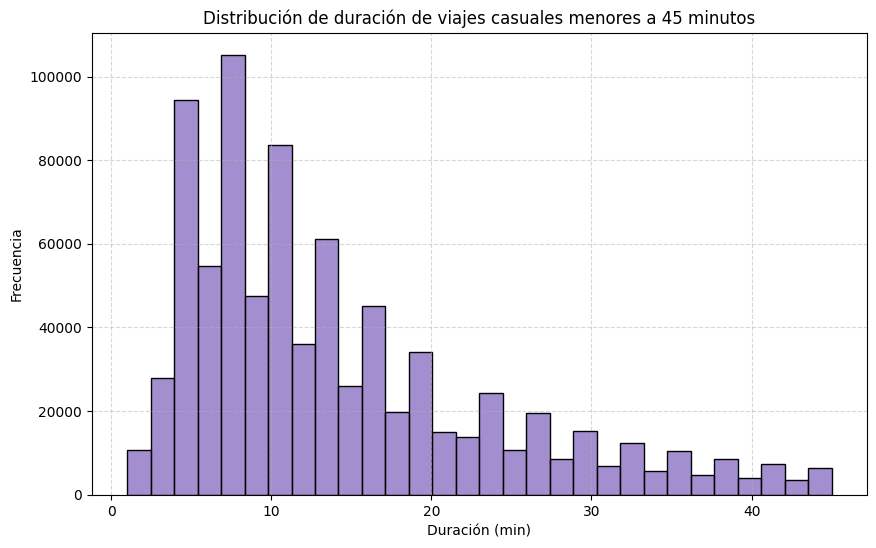

In [86]:
# Grafica de distribución de duración de viajes para casuales <45 minutos
# Grafica de distribución de duración de viajes para casuales <45 minutos
plt.figure(figsize=(10, 6))
sns.histplot(posibles_miembros['duration_min'], bins=30, color='#8469BF')  
plt.title('Distribución de duración de viajes casuales menores a 45 minutos')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [95]:
posibles_miembros.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,duration_min,month,start_hour
count,823736,823736,823736.000000,823736.000000,823736.000000,823736.000000,823736.000000,823736.000000,823736.000000
mean,2024-07-21 05:24:32.879065344,2024-07-21 05:38:38.720066304,41.899253,-87.643366,41.900010,-87.643922,14.096598,7.147898,14.624074
min,2024-01-01 00:02:15,2024-01-01 00:07:01,41.648501,-87.843960,41.648501,-87.843960,1.000000,1.000000,0.000000
25%,2024-06-03 12:25:10.448999936,2024-06-03 12:40:40.729499904,41.880958,-87.654787,41.881032,-87.656853,7.000000,6.000000,12.000000
50%,2024-07-25 17:24:25.550500096,2024-07-25 17:38:42.076999936,41.893992,-87.638742,41.894666,-87.639192,11.000000,7.000000,16.000000
75%,2024-09-16 08:57:31.999000064,2024-09-16 09:08:26.830500096,41.922695,-87.625908,41.924161,-87.626030,19.000000,9.000000,18.000000
max,2024-12-31 23:54:01.903000,2024-12-31 23:59:28.819000,42.064854,-87.528232,42.064854,-87.528232,45.000000,12.000000,23.000000
std,NaN,NaN,0.042874,0.026919,0.043074,0.027169,9.663823,2.451073,4.786730


In [87]:
# Promedio de duración de viajes casuales menores a 45 minutos
promedio_duracion = posibles_miembros['duration_min'].mean()
print(f"Promedio de duración de viajes casuales menores a 45 minutos: {promedio_duracion:.2f} minutos")

Promedio de duración de viajes casuales menores a 45 minutos: 14.10 minutos


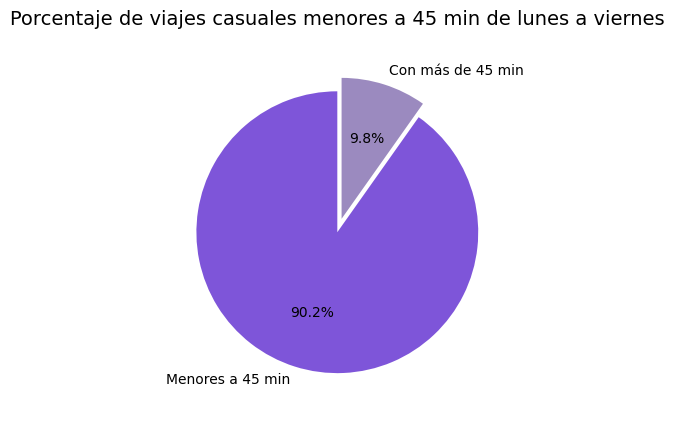

In [88]:
# Grafica circular para visualizar el porcentaje de viajes casuales menores a 45 min de luneas aviernes 
# respecto al total de viajes casuales

plt.figure(figsize=(4, 5))
plt.pie(
    [posibles_miembros.shape[0], df_weekdays[df_weekdays['member_casual'] == 'casual'].shape[0] - posibles_miembros.shape[0]],
    labels=['Menores a 45 min', 'Con más de 45 min'],
    explode=(0.1, 0),  # Resaltar la porción de menores a 45 min
    startangle=90, # Iniciar el gráfico en 90 grados
    autopct='%1.1f%%',
    colors=['#7E55D9', '#9B8ABF']
)
plt.title('Porcentaje de viajes casuales menores a 45 min de lunes a viernes', fontsize=14, color='black')
plt.axis('equal')  
plt.show()

El 90% de los clientes 'casuales' que realizan viajes de lunes a viernes, ya utilizan el servicio dentro de los limites que les ofrece ser 'miembros', indicando que pueden tener necesidades mas regulares o repetidas, pero aún no dan el paso para el pase anual. Ya están usando el servicio de forma eficiente, como lo haría un miembro habitual.

#### ¿Qué estaciones usan? ¿en qué horarios? ¿usan estaciones en zonas laborales o residenciales?

 Encontrar las estaciones de inicio más concurridas entre las 8 y 17 hrs por clientes casuales, porque esos podrían ser candidatos a convertirse en miembros.

In [99]:
# Ubicar las estaciones de inicio existentes en posibles_miembros 

posibles_miembros['start_station_name'].nunique()

1450

In [103]:
# Comparar estaciones de inicio de posibles_miembros con las estaciones de inicio de member de luneas a viernes 
# para ver si hay coincidencias
estaciones_miembros = df_weekdays[df_weekdays['member_casual'] == 'member']['start_station_name'].nunique()
estaciones_miembros

1642

In [106]:
# Filtrar estaciones de inicio que son iguales en posibles_miebros y member del df_weekdays
estaciones_comunes = set(posibles_miembros['start_station_name']).intersection(set(df_weekdays[df_weekdays['member_casual'] == 'member']['start_station_name']))
# contar las estaciones comunes
len(estaciones_comunes)

1372

In [ ]:
# Crear un data frame con las estaciones comunes, duración de viaje < 45 min, usuarios 'casual' y 'member', star_long y end_lng 
# para crear un mapa de calor, quitar columna rideable_type,started_at,ended_at,start_station_id,end_station_name,end_station_id,end_lat,end_lng,trip_status

df_comparativa_estaciones = df_weekdays[
    (df_weekdays['start_station_name'].isin(estaciones_comunes)) &
    (df_weekdays['duration_min'] <= 45) &
    (df_weekdays['member_casual'].isin(['casual', 'member']))
].copy()

df_comparativa_estaciones.drop(columns=['rideable_type', 'started_at', 'ended_at', 'start_station_id', 'end_station_name', 'end_station_id', 'end_lat', 'end_lng', 'trip_status'], inplace=True)
df_comparativa_estaciones.reset_index(drop=True, inplace=True)


df_comparativa_estaciones

,ride_id,start_station_name,start_lat,start_lng,member_casual,duration_min,month,start_hour,day_week
0,C1D650626C8C899A,Wells St & Elm St,41.903267,-87.634737,member,8,1,15,Friday
1,EECD38BDB25BFCB0,Wells St & Elm St,41.902937,-87.634440,member,7,1,15,Monday
2,0A0D9E15EE50B171,Wells St & Randolph St,41.884295,-87.633963,member,30,1,16,Monday
3,33FFC9805E3EFF9A,Lincoln Ave & Waveland Ave,41.948797,-87.675278,member,26,1,5,Wednesday
4,0EA7CB313D4F456A,Wells St & Elm St,41.903222,-87.634324,member,9,1,14,Friday
...,...,...,...,...,...,...,...,...,...
2830359,599BE7347D0B9CCC,Albany Ave & Bloomingdale Ave,41.914027,-87.705126,member,8,12,8,Wednesday
2830360,36DAF3C93190E07F,Albany Ave & Bloomingdale Ave,41.914027,-87.705126,member,6,12,15,Friday
2830361,71F02C3CF79B8090,Albany Ave & Bloomingdale Ave,41.914027,-87.705126,member,7,12,8,Tuesday
2830362,85AE8840FA0E4EAB,Albany Ave & Bloomingdale Ave,41.914027,-87.705126,member,7,12,8,Wednesday


In [111]:
df_comparativa_estaciones.to_csv('df_comparativa_estaciones.csv', index=False)

In [108]:
df_comparativa_estaciones['start_station_name'].nunique()

1372